# IHLT Lab 8: Parsing

**Author:** *Zachary Parent ([zachary.parent](mailto:zachary.parent@estudiantat.upc.edu))*

### 2024-11-25

**Instructions:**

* Consider the following sentence:
    > Lazy cats play with mice.
* Expand the grammar of the example related to non-probabilistic chart parsers in order to subsume this new sentence.

* Perform the constituency parsing using a BottomUpChartParser, a BottomUpLeftCornerChartParser and a LeftCornerChartParser.

* For each one of them, provide the resulting tree, the number of edges and the list of explored edges.

* Which parser is the most efficient for parsing the sentence?

* Which edges are filtered out by each parser and why?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk import CFG, ChartParser, BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser
import svgling

## Provided Example

<class 'nltk.parse.chart.ChartParser'>


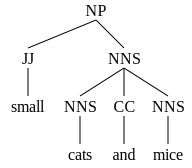

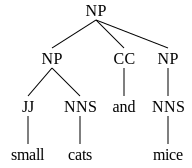

,parser,num_trees,num_edges,edges
0,ChartParser,2,28,"[[0:1] 'small', [1:2] 'cats', [2:3] 'and', [3:..."


In [2]:
grammar = CFG.fromstring('''
  NP  -> NNS | JJ NNS | NP CC NP
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
  JJ  -> "big" | "small"
  CC  -> "and" | "or"
  ''')

sent = "small cats and mice"

parsers = [ChartParser]
chart_stats = []

for parser_class in parsers:
    print(parser_class)
    parser = parser_class(grammar)
    chart = parser.chart_parse(sent.split())
    trees = list(chart.parses(grammar.start()))
    for tree in trees:
        display(svgling.draw_tree(tree))
    chart_stats.append({
        "parser": parser_class.__name__,
        "num_trees": len(trees),
        "num_edges": chart.num_edges(),
        "edges": chart.edges()
    })

chart_stats = pd.DataFrame(chart_stats)
chart_stats


## Expanding grammar to handle "Lazy cats play with mice."

BottomUpChartParser


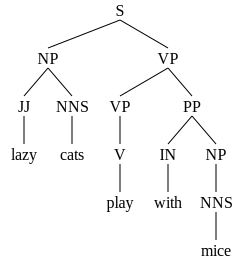

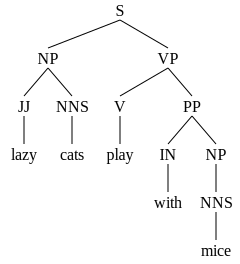

Explored edges:
	[[Edge: [0:1] 'lazy'], [Edge: [1:2] 'cats'], [Edge: [2:3] 'play'], [Edge: [3:4] 'with'], [Edge: [4:5] 'mice'], [Edge: [0:0] JJ -> * 'lazy'], [Edge: [0:1] JJ -> 'lazy' *], [Edge: [0:0] NP -> * JJ NNS], [Edge: [0:1] NP -> JJ * NNS], [Edge: [1:1] NNS -> * 'cats'], [Edge: [1:2] NNS -> 'cats' *], [Edge: [1:1] NP -> * NNS], [Edge: [1:1] NNS -> * NNS CC NNS], [Edge: [0:2] NP -> JJ NNS *], [Edge: [1:2] NP -> NNS *], [Edge: [1:2] NNS -> NNS * CC NNS], [Edge: [1:1] S  -> * NP VP], [Edge: [1:1] NP -> * NP CC NP], [Edge: [1:2] S  -> NP * VP], [Edge: [1:2] NP -> NP * CC NP], [Edge: [0:0] S  -> * NP VP], [Edge: [0:0] NP -> * NP CC NP], [Edge: [0:2] S  -> NP * VP], [Edge: [0:2] NP -> NP * CC NP], [Edge: [2:2] V  -> * 'play'], [Edge: [2:3] V  -> 'play' *], [Edge: [2:2] VP -> * V], [Edge: [2:2] VP -> * V PP], [Edge: [2:3] VP -> V *], [Edge: [2:3] VP -> V * PP], [Edge: [2:2] VP -> * VP PP], [Edge: [1:3] S  -> NP VP *], [Edge: [0:3] S  -> NP VP *], [Edge: [2:3] VP -> VP * PP], [Edge: [3:

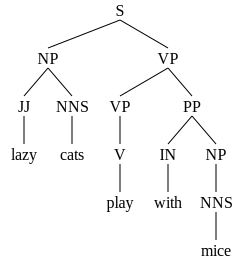

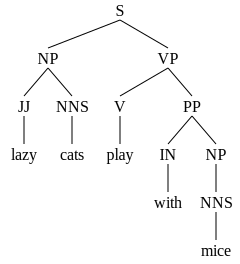

Explored edges:
	[[Edge: [0:1] 'lazy'], [Edge: [1:2] 'cats'], [Edge: [2:3] 'play'], [Edge: [3:4] 'with'], [Edge: [4:5] 'mice'], [Edge: [0:1] JJ -> 'lazy' *], [Edge: [0:1] NP -> JJ * NNS], [Edge: [1:2] NNS -> 'cats' *], [Edge: [1:2] NP -> NNS *], [Edge: [1:2] NNS -> NNS * CC NNS], [Edge: [0:2] NP -> JJ NNS *], [Edge: [0:2] S  -> NP * VP], [Edge: [0:2] NP -> NP * CC NP], [Edge: [1:2] S  -> NP * VP], [Edge: [1:2] NP -> NP * CC NP], [Edge: [2:3] V  -> 'play' *], [Edge: [2:3] VP -> V *], [Edge: [2:3] VP -> V * PP], [Edge: [2:3] VP -> VP * PP], [Edge: [0:3] S  -> NP VP *], [Edge: [1:3] S  -> NP VP *], [Edge: [3:4] IN -> 'with' *], [Edge: [3:4] PP -> IN * NP], [Edge: [4:5] NNS -> 'mice' *], [Edge: [4:5] NP -> NNS *], [Edge: [4:5] NNS -> NNS * CC NNS], [Edge: [4:5] S  -> NP * VP], [Edge: [4:5] NP -> NP * CC NP], [Edge: [3:5] PP -> IN NP *], [Edge: [2:5] VP -> V PP *], [Edge: [2:5] VP -> VP PP *], [Edge: [2:5] VP -> VP * PP], [Edge: [0:5] S  -> NP VP *], [Edge: [1:5] S  -> NP VP *]]

LeftCorner

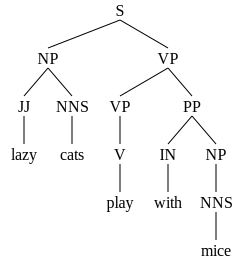

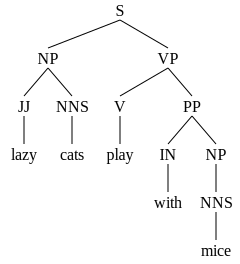

Explored edges:
	[[Edge: [0:1] 'lazy'], [Edge: [1:2] 'cats'], [Edge: [2:3] 'play'], [Edge: [3:4] 'with'], [Edge: [4:5] 'mice'], [Edge: [0:1] JJ -> 'lazy' *], [Edge: [0:1] NP -> JJ * NNS], [Edge: [1:2] NNS -> 'cats' *], [Edge: [1:2] NP -> NNS *], [Edge: [0:2] NP -> JJ NNS *], [Edge: [0:2] S  -> NP * VP], [Edge: [1:2] S  -> NP * VP], [Edge: [2:3] V  -> 'play' *], [Edge: [2:3] VP -> V *], [Edge: [2:3] VP -> V * PP], [Edge: [2:3] VP -> VP * PP], [Edge: [0:3] S  -> NP VP *], [Edge: [1:3] S  -> NP VP *], [Edge: [3:4] IN -> 'with' *], [Edge: [3:4] PP -> IN * NP], [Edge: [4:5] NNS -> 'mice' *], [Edge: [4:5] NP -> NNS *], [Edge: [3:5] PP -> IN NP *], [Edge: [2:5] VP -> V PP *], [Edge: [2:5] VP -> VP PP *], [Edge: [0:5] S  -> NP VP *], [Edge: [1:5] S  -> NP VP *]]



,parser,num_trees,num_edges
0,BottomUpChartParser,2,54
1,BottomUpLeftCornerChartParser,2,34
2,LeftCornerChartParser,2,27


In [3]:
grammar = CFG.fromstring('''
  S   -> NP VP
  NP  -> NNS | JJ NNS | NP CC NP
  VP  -> V | V PP | VP PP
  PP  -> IN NP
  NNS -> "cats" | "dogs" | "mice" | NNS CC NNS 
  JJ  -> "big" | "small" | "lazy"
  IN  -> "with"
  CC  -> "and" | "or"
  V   -> "play"
  ''')

sent = "Lazy cats play with mice.".lower().strip(".")

parsers = [BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser]
chart_stats = []

for parser_class in parsers:
    print(parser_class.__name__)
    parser = parser_class(grammar)
    chart = parser.chart_parse(sent.split())  # Use chart_parse instead of parse
    trees = list(chart.parses(grammar.start()))
    for tree in trees:
        display(svgling.draw_tree(tree))
    print(f"Explored edges:\n\t{chart.edges()}\n")
    chart_stats.append({
        "parser": parser_class.__name__,
        "num_trees": len(trees),
        "num_edges": chart.num_edges(),
    })

chart_stats = pd.DataFrame(chart_stats)
chart_stats


## Analysis

### Which parser is the most efficient for parsing the sentence?

The **LeftCornerChartParser** is the most efficient for parsing the sentence.

### Which edges are filtered out by each parser and why?

**BottomUpChartParser (54 edges)**

The BottomUpChartParser is the least efficient for parsing the sentence, as it explores all edges, generating edges for all possible constituents regardless of whether they can be part of a valid parse.

**BottomUpLeftCornerChartParser (34 edges)**

The BottomUpLeftCornerChartParser is more efficient than the BottomUpChartParser, filtering edges by only creating constituents that could be the left corner of some rule in the grammar. It still works bottom-up.

For example, after seeing "lazy" (JJ), it only considers rules where JJ can be the left corner of a larger constituent (NP in this case).

**LeftCornerChartParser (27 edges)**

The LeftCornerChartParser is the most efficient for parsing the sentence. It filters edges by using top-down prediction combined with left-corner parsing. As a result, it only explores edges that could be part of a valid parse.

For example, it starts with S and knows S must start with NP, sees "lazy" can be part of NP, and continues down this path. But it would not consider a VP as a valid left corner, and so it would not explore the edges starting with V.